In [1]:
import os
import json
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import grid2op
from grid2op.PlotGrid import PlotMatplot
from pprint import pprint

## Load ENV

In [2]:
# Defin ENV path
path = '/Users/camiloromero/data_grid2op/rte_case14_realistic/'

env_path = os.path.abspath(path)

In [3]:
# Load ENV
env = grid2op.make(env_path)

In [4]:
env.backend.get_thermal_limit()

array([ 384.90018,  384.90018,  380.     ,  380.     ,  157.     ,
        380.     ,  380.     , 1077.7205 ,  461.88022,  769.80035,
        269.4301 ,  384.90018,  760.     ,  380.     ,  760.     ,
        384.90018,  230.94011,  170.79945, 3402.2427 , 3402.2427 ],
      dtype=float32)

## Line id finder

In [5]:
# To find lines
info_lines = {i:(l[0], l[1]) for i, l in enumerate(zip(env.line_or_to_subid, env.line_ex_to_subid))}
info_lines

{0: (0, 1),
 1: (0, 4),
 2: (1, 2),
 3: (1, 3),
 4: (1, 4),
 5: (2, 3),
 6: (3, 4),
 7: (5, 10),
 8: (5, 11),
 9: (5, 12),
 10: (8, 9),
 11: (8, 13),
 12: (9, 10),
 13: (11, 12),
 14: (12, 13),
 15: (3, 6),
 16: (3, 8),
 17: (4, 5),
 18: (6, 7),
 19: (8, 6)}

## Plot the grid

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


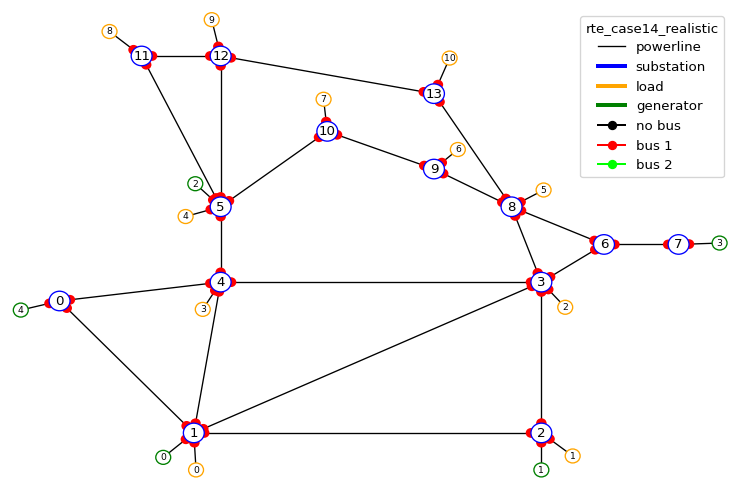

In [6]:
plot_helper = PlotMatplot(env.observation_space, 
                          sub_radius=14, 
                          load_radius=10, 
                          gen_radius=10,
                          width=750,
                          height=500,
                        )
plot_helper._line_bus_radius = 7
plot_helper._line_arrow_width = 10
plot_helper._line_arrow_len = 17


fig = plot_helper.plot_layout()
fig.show()

## Helper func to plot

In [7]:
def plot_action(action):
    obs = env.reset()
    obs, reward, done, info = env.step(env.action_space(action))
    fig_obs = plot_helper.plot_obs(obs, line_info=None, load_info=None, gen_info=None)
    print('Is ambigous??? -> {}'.format(info['is_ambiguous']))
    print('Exception => {}'.format(info['exception']))
    print()
    return fig_obs

## Helper func to append unitary actions

In [8]:
def append_unitary_actions(elem, ut):
    elem_type, elem_id = elem.split('_')
    k_name = f'{elem_type}_{elem_id}'
    if elem_type == 'sub':
        states[k_name] = {string.ascii_lowercase[i]: d[int(elem_id)] for i, d in enumerate(ut)}
    if elem_type == 'line':
        states[k_name] = {'a': ut[int(elem_id)],
                          'b': {"set_line": 0}
                         }   

## Process state for Oracle

In [9]:
import sys

sys.path.append('../')

In [10]:
from sub_elems import get_valid_sub_action
from sub_elems import get_valid_line_action

In [11]:
action_space = env.action_space

states = {}

## Subtation 4

In [12]:
sub_id = 4

In [13]:
unit_sub_1 = {sub_id: {"lines_id_bus": [(4, 2)], 
                       "loads_id_bus": [(3, 2)],
                      },
             }

Is ambigous??? -> False
Exception => []



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


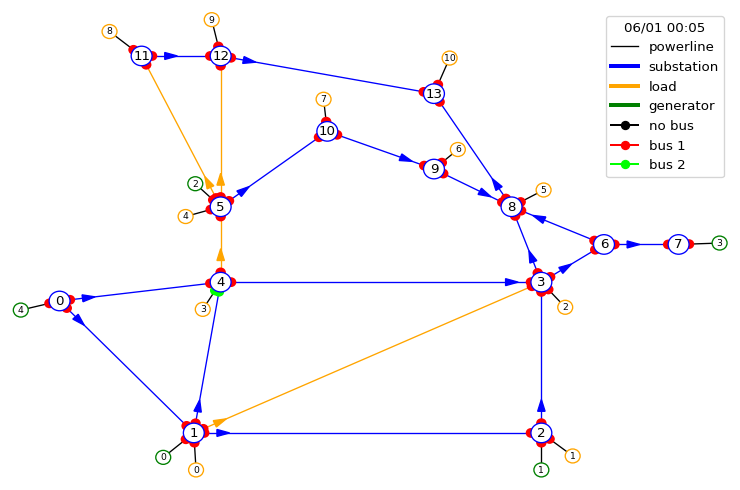

In [14]:
sub_state = get_valid_sub_action(action_space, unit_sub_1)

# Plot state
fig_obs = plot_action(sub_state)
fig_obs.show()

In [15]:
unit_sub_2 = {sub_id: {"lines_id_bus": [(4, 2), (6, 2)], 
                      },
             }

Is ambigous??? -> False
Exception => []



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


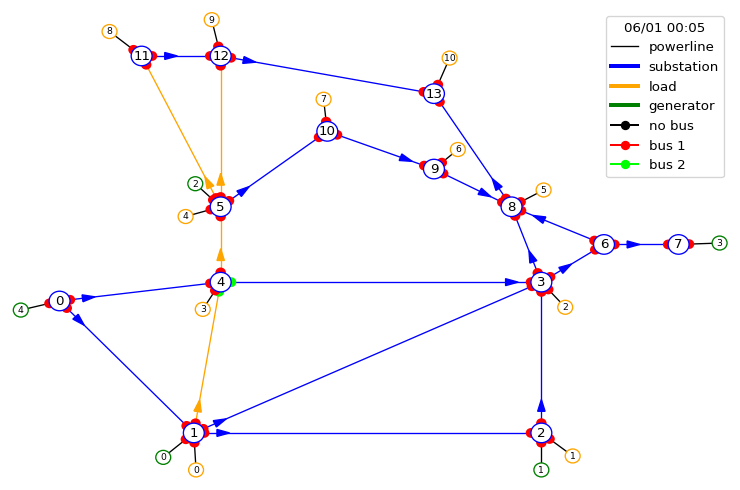

In [16]:
sub_state = get_valid_sub_action(action_space, unit_sub_2)

# Plot state
fig_obs = plot_action(sub_state)
fig_obs.show()

In [17]:
unit_sub_3 = {sub_id: {"lines_id_bus": [(1, 2), (17, 2)], 
                      },
             }

Is ambigous??? -> False
Exception => []



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


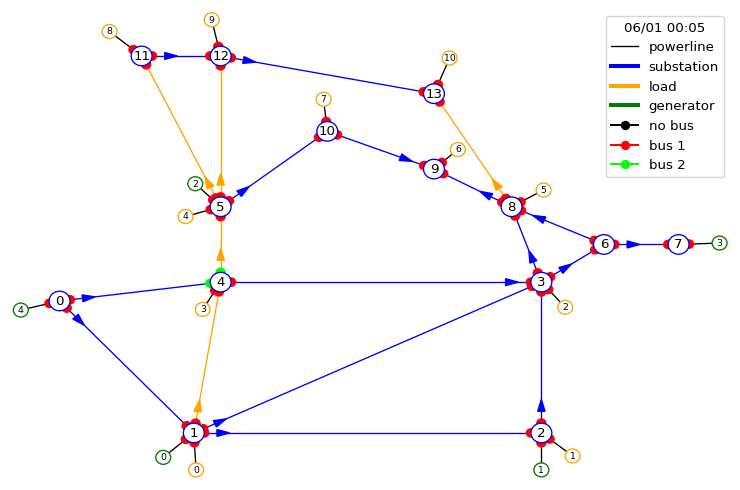

In [18]:
sub_state = get_valid_sub_action(action_space, unit_sub_3)

# Plot state
fig_obs = plot_action(sub_state)
fig_obs.show()

In [19]:
unit_sub_4 = {sub_id: {}}

In [20]:
# Append unitary actions
append_unitary_actions(f'sub_{sub_id}', [unit_sub_1, unit_sub_2, unit_sub_3, unit_sub_4])

## Substation 3

In [21]:
sub_id = 3

In [22]:
unit_sub_1 = {sub_id: {"lines_id_bus": [(6, 2), (16, 2)], 
                      },
             }

Is ambigous??? -> False
Exception => []



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


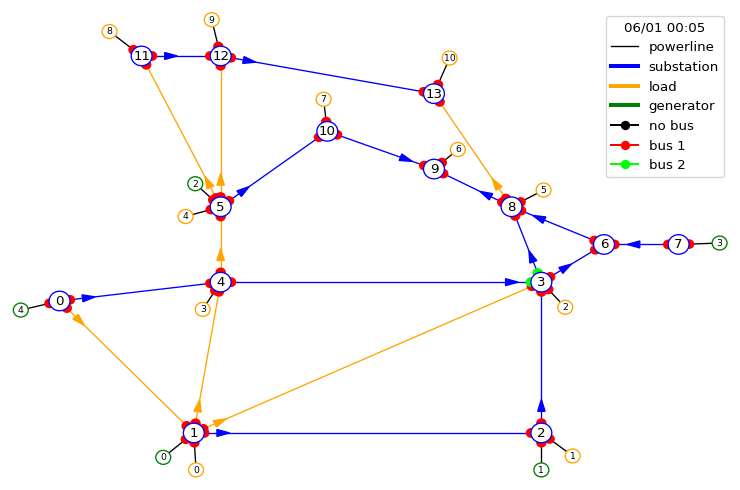

In [23]:
sub_state = get_valid_sub_action(action_space, unit_sub_1)

# Plot state
fig_obs = plot_action(sub_state)
fig_obs.show()

In [24]:
unit_sub_2 = {sub_id: {"lines_id_bus": [(6, 2), (15, 2)], 
                      },
             }

Is ambigous??? -> False
Exception => []



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


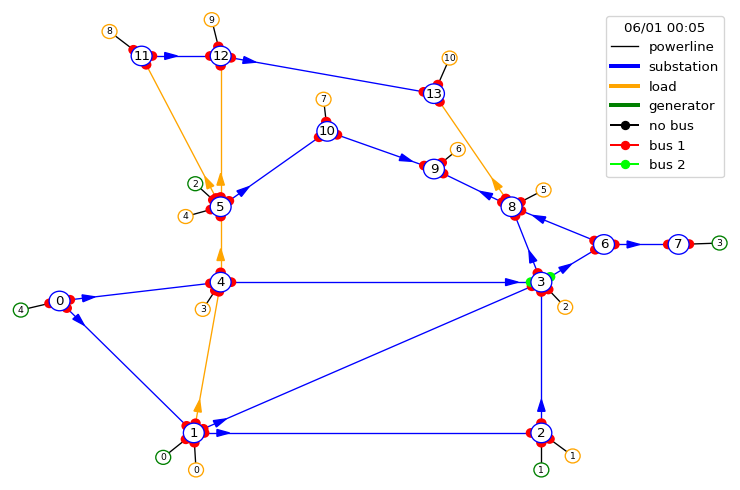

In [25]:
sub_state = get_valid_sub_action(action_space, unit_sub_2)

# Plot state
fig_obs = plot_action(sub_state)
fig_obs.show()

In [26]:
unit_sub_3 = {sub_id: {"lines_id_bus": [(16, 2), (5, 2)], 
                      },
             }

Is ambigous??? -> False
Exception => []



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


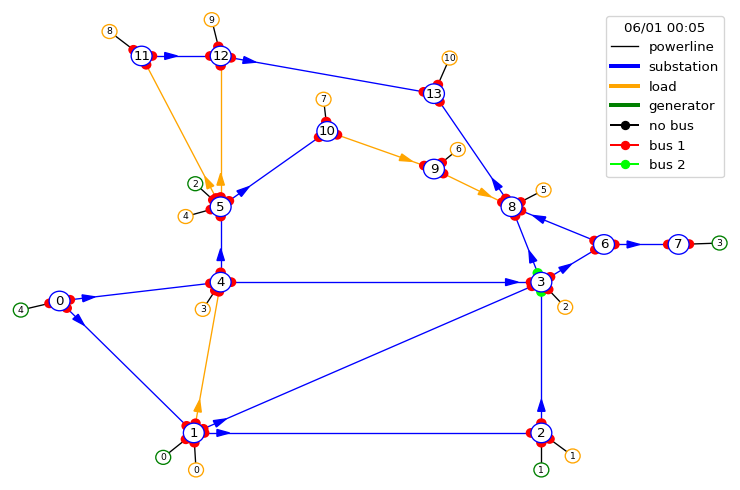

In [27]:
sub_state = get_valid_sub_action(action_space, unit_sub_3)

# Plot state
fig_obs = plot_action(sub_state)
fig_obs.show()

In [28]:
unit_sub_4 = {sub_id: {"lines_id_bus": [(16, 2), (5, 2), (6, 2)], 
                      },
             }

Is ambigous??? -> False
Exception => []



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


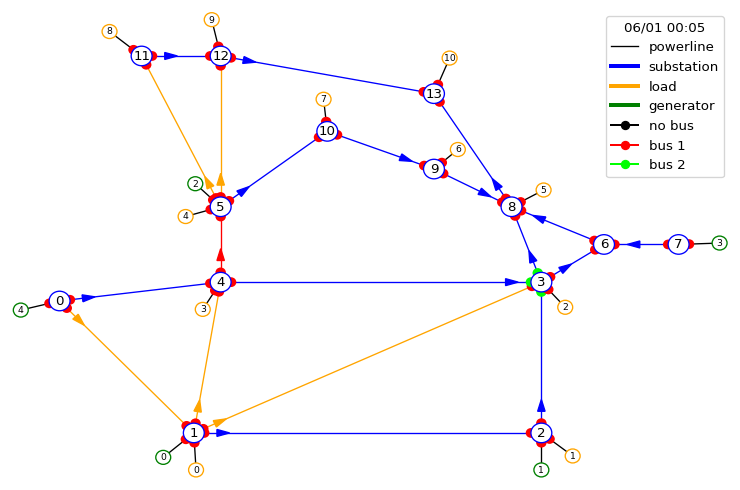

In [29]:
sub_state = get_valid_sub_action(action_space, unit_sub_4)

# Plot state
fig_obs = plot_action(sub_state)
fig_obs.show()

In [30]:
unit_sub_5 = {sub_id: {}}

In [31]:
# Append unitary actions
append_unitary_actions(f'sub_{sub_id}', [unit_sub_1, unit_sub_2, unit_sub_3, unit_sub_4, unit_sub_5])

## Substation 1

In [32]:
sub_id = 1

In [33]:
unit_sub_1 = {sub_id: {"lines_id_bus": [(0, 2), (4, 2)], 
                       "loads_id_bus": [(0, 2)]
                      },
             }

Is ambigous??? -> False
Exception => []



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


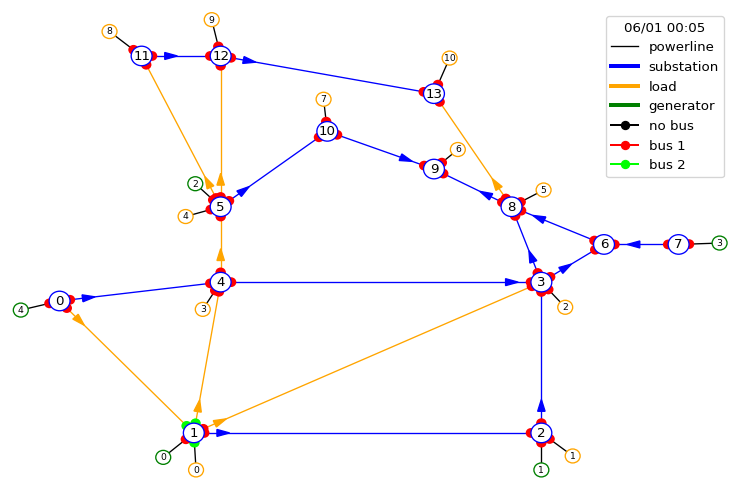

In [34]:
sub_state = get_valid_sub_action(action_space, unit_sub_1)

# Plot state
fig_obs = plot_action(sub_state)
fig_obs.show()

In [35]:
unit_sub_2 = {sub_id: {"lines_id_bus": [(0, 2), (4, 2), (2, 2)], 
                      },
             }

Is ambigous??? -> False
Exception => []



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


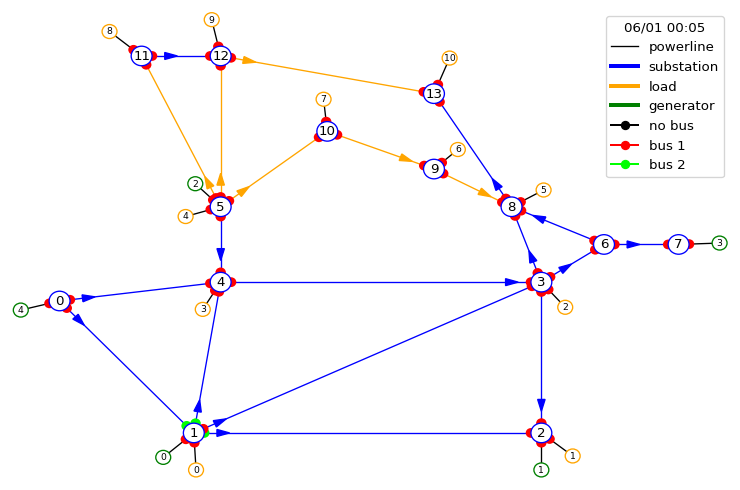

In [36]:
sub_state = get_valid_sub_action(action_space, unit_sub_2)

# Plot state
fig_obs = plot_action(sub_state)
fig_obs.show()

In [37]:
unit_sub_3 = {sub_id: {"lines_id_bus": [(0, 2), (3, 2), (4, 2)], 
                      },
             }

Is ambigous??? -> False
Exception => []



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


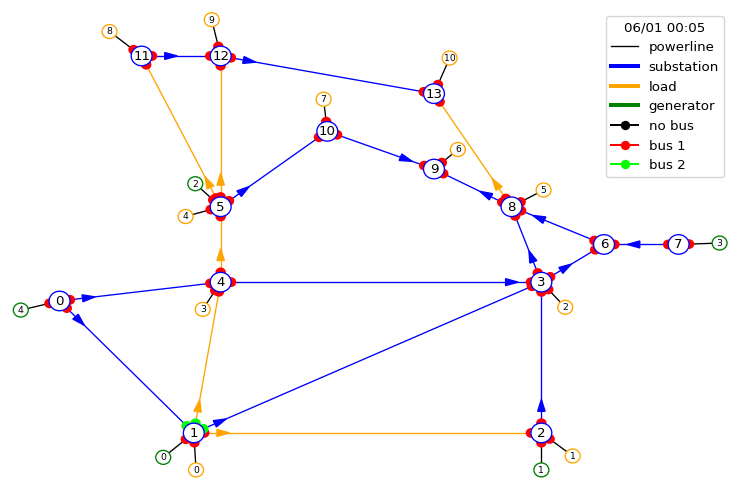

In [38]:
sub_state = get_valid_sub_action(action_space, unit_sub_3)

# Plot state
fig_obs = plot_action(sub_state)
fig_obs.show()

In [39]:
unit_sub_4 = {sub_id: {}}

In [40]:
# Append unitary actions
append_unitary_actions(f'sub_{sub_id}', [unit_sub_1, unit_sub_2, unit_sub_3, unit_sub_4])

## Substation 8

In [41]:
sub_id = 8

In [42]:
unit_sub_1 = {sub_id: {"lines_id_bus": [(19, 2), (10, 2), (11, 2)], 
                      },
             }

Is ambigous??? -> False
Exception => []



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


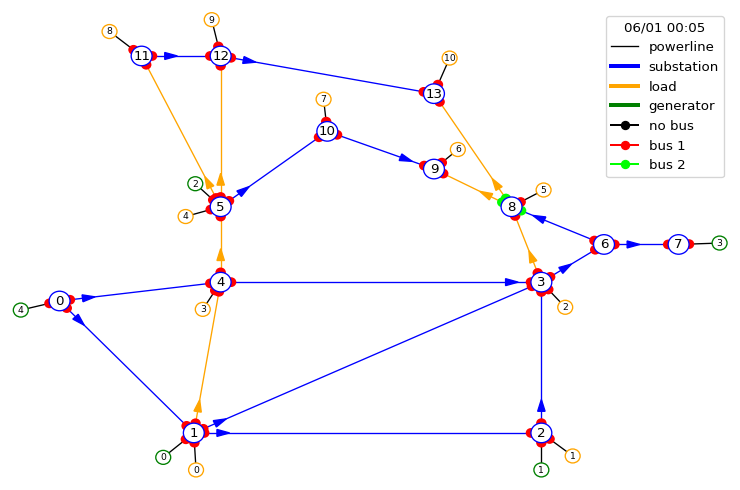

In [43]:
sub_state = get_valid_sub_action(action_space, unit_sub_1)

# Plot state
fig_obs = plot_action(sub_state)
fig_obs.show()

In [44]:
unit_sub_2 = {sub_id: {"lines_id_bus": [(16, 2), (11, 2)], 
                      },
             }

Is ambigous??? -> False
Exception => []



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


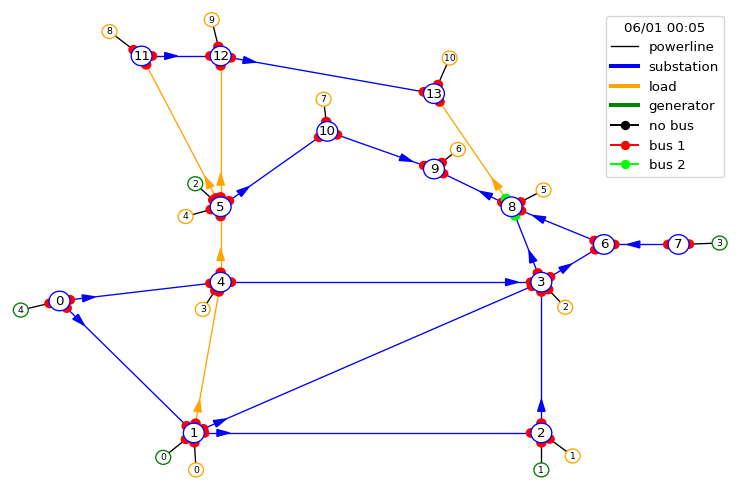

In [45]:
sub_state = get_valid_sub_action(action_space, unit_sub_2)

# Plot state
fig_obs = plot_action(sub_state)
fig_obs.show()

In [46]:
unit_sub_3 = {sub_id: {}}

In [47]:
# Append unitary actions
append_unitary_actions(f'sub_{sub_id}', [unit_sub_1, unit_sub_2, unit_sub_3])

## Substation 5

In [48]:
sub_id = 5

In [49]:
unit_sub_1 = {sub_id: {"lines_id_bus": [(17, 2), (9, 2), (7, 2)], 
                      },
             }

Is ambigous??? -> False
Exception => []



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


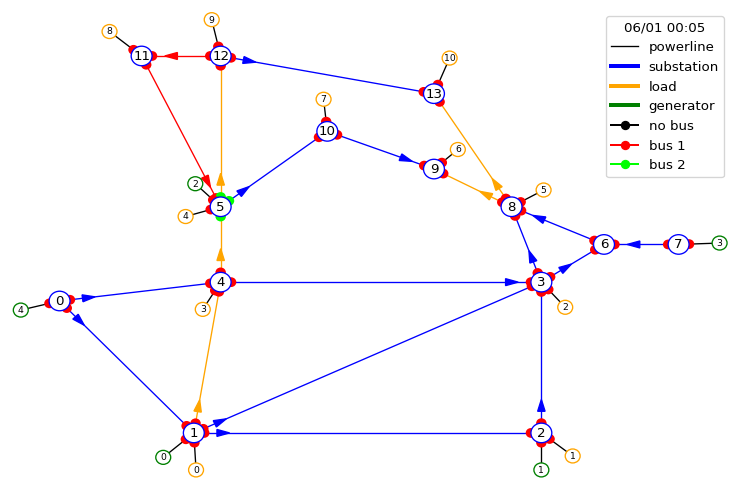

In [50]:
sub_state = get_valid_sub_action(action_space, unit_sub_1)

# Plot state
fig_obs = plot_action(sub_state)
fig_obs.show()

In [51]:
unit_sub_2 = {sub_id: {}}

In [52]:
# Append unitary actions
append_unitary_actions(f'sub_{sub_id}', [unit_sub_1, unit_sub_2])

In [55]:
pprint(states)

{'sub_1': {'a': {'lines_id_bus': [(0, 2), (4, 2)], 'loads_id_bus': [(0, 2)]},
           'b': {'lines_id_bus': [(0, 2), (4, 2), (2, 2)]},
           'c': {'lines_id_bus': [(0, 2), (3, 2), (4, 2)]},
           'd': {}},
 'sub_3': {'a': {'lines_id_bus': [(6, 2), (16, 2)]},
           'b': {'lines_id_bus': [(6, 2), (15, 2)]},
           'c': {'lines_id_bus': [(16, 2), (5, 2)]},
           'd': {'lines_id_bus': [(16, 2), (5, 2), (6, 2)]},
           'e': {}},
 'sub_4': {'a': {'lines_id_bus': [(4, 2)], 'loads_id_bus': [(3, 2)]},
           'b': {'lines_id_bus': [(4, 2), (6, 2)]},
           'c': {'lines_id_bus': [(1, 2), (17, 2)]},
           'd': {}},
 'sub_5': {'a': {'lines_id_bus': [(17, 2), (9, 2), (7, 2)]}, 'b': {}},
 'sub_8': {'a': {'lines_id_bus': [(19, 2), (10, 2), (11, 2)]},
           'b': {'lines_id_bus': [(16, 2), (11, 2)]},
           'c': {}}}


## Save states as dict

In [54]:
names = 'actions_dict/unitary_actions_l2rpn_2019.json'

with open(names, 'w') as f:
    json.dump(states, f)